In [3]:
import pandas as pd
import numpy as np

In [5]:
train = pd.read_csv("../ya/data/train_new(dropFN).csv").set_index('VisitNumber')
test = pd.read_csv("data/test_new(dropFN).csv").set_index('VisitNumber')

FileNotFoundError: File b'../ya/data/train_new(dropFN).csv' does not exist

In [118]:
train.head()

,TripType,Weekday,NumItems,Return,CategoryCounts,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,37,5,-1,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,22,5,2,0.0,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,18,5,28,1.0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5,5,3,0.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,5,5,3,0.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test.head()

,Weekday,NumItems,Return,CategoryCounts,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
1,5,4,0.0,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5,4,0.0,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5,0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
test_VN = test.reset_index()
test_VN.head()

,VisitNumber,Weekday,NumItems,Return,CategoryCounts,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,1,5,4,0.0,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,5,4,0.0,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,5,0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,5,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,5,0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
train_col = train.drop(['TripType'], axis=1)
dfX = train_col
dfy = train.TripType

### Ensemble methods - AdaBoost

In [6]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

In [11]:
seed = 1
num_trees = 800

In [12]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [13]:
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, dfX, dfy, cv=kfold)

In [14]:
results.mean()

0.20369176282007584

--> 쓰레기....

### XGBoost

#### 1.

In [45]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss

In [16]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

In [56]:
mytrain, mytest = train_test_split(train, test_size = .4)

In [58]:
mytrain_ = mytrain.drop(['TripType'], axis=1)

In [62]:
mytest_ = mytest.drop(['TripType'], axis=1)

In [63]:
mytest_.head()

,Weekday,NumItems,Return,CategoryCounts,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
14171,7,11,0.0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74555,2,1,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18280,7,-1,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21849,1,10,0.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
186203,7,8,0.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
dtrain = xgb.DMatrix(np.asarray(mytrain_), label = np.asarray(mytrain.TripType))
dtest = xgb.DMatrix(np.asarray(mytest_), label = np.asarray(mytest.TripType))

In [67]:
num_round = 200
param1 = {'objective': 'multi:softmax', 'num_class':38, "max_delta_step": 1}
watchlist1 = [(dtrain,'train'), (dtest, 'eval')]

bst = xgb.train(param1, dtrain, num_round, watchlist1, early_stopping_rounds=5)

[0]	train-merror:0.546896	eval-merror:0.558845
Multiple eval metrics have been passed: 'eval-merror' will be used for early stopping.

Will train until eval-merror hasn't improved in 5 rounds.
[1]	train-merror:0.508972	eval-merror:0.526679
[2]	train-merror:0.458836	eval-merror:0.481448
[3]	train-merror:0.412271	eval-merror:0.43768
[4]	train-merror:0.38013	eval-merror:0.406271
[5]	train-merror:0.333566	eval-merror:0.360152
[6]	train-merror:0.321964	eval-merror:0.350405
[7]	train-merror:0.312679	eval-merror:0.341469
[8]	train-merror:0.309456	eval-merror:0.340894
[9]	train-merror:0.303428	eval-merror:0.33768
[10]	train-merror:0.294962	eval-merror:0.329449
[11]	train-merror:0.296147	eval-merror:0.332166
[12]	train-merror:0.287227	eval-merror:0.324562
[13]	train-merror:0.283865	eval-merror:0.322367
[14]	train-merror:0.280973	eval-merror:0.321871
[15]	train-merror:0.276305	eval-merror:0.317507
[16]	train-merror:0.273082	eval-merror:0.316723
[17]	train-merror:0.270086	eval-merror:0.316253
[18

In [92]:
my_test = xgb.DMatrix(np.asarray(mytest_))
test_predictions = bst.predict(my_test).astype(int)

In [98]:
test_predictions

array([31,  6, 37, ...,  6, 19,  9])

In [99]:
np.array(mytest.TripType)

array([25,  6, 37, ...,  6, 19,  9])

In [91]:
len(set(test_predictions))

37

In [73]:
len(mytest.TripType)

38270

In [102]:
from sklearn.metrics import *

In [101]:
confusion_matrix(np.array(mytest.TripType), test_predictions)

array([[1458,    0,    1, ...,    0,    1,    0],
       [   0,    1,  114, ...,    0,    0,    0],
       [   2,    3, 1536, ...,    0,    1,    1],
       ...,
       [   0,    0,   10, ...,    8,    3,    0],
       [   0,    0,    4, ...,    0,   70,    0],
       [ 283,    0,   33, ...,    0,    0, 2562]])

In [104]:
print(classification_report(np.array(mytest.TripType), test_predictions))

             precision    recall  f1-score   support

          0       0.78      0.98      0.87      1482
          1       0.25      0.01      0.02       128
          2       0.75      0.84      0.79      1828
          3       0.69      0.76      0.72       499
          4       0.70      0.66      0.68      2345
          5       0.78      0.86      0.82      4807
          6       0.72      0.77      0.74      3769
          7       0.22      0.07      0.10       105
          8       0.00      0.00      0.00         2
          9       0.61      0.40      0.48       372
         10       0.36      0.38      0.37       197
         11       0.34      0.20      0.25       157
         12       0.66      0.62      0.64       252
         13       0.64      0.67      0.65       262
         14       0.40      0.34      0.37       343
         15       0.43      0.29      0.34        56
         16       0.59      0.60      0.60      1053
         17       0.70      0.76      0.73   

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [97]:
log_loss(np.array(mytest.TripType), test_predictions).round(5)

ValueError: y_true and y_pred contain different number of classes 38, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]

In [76]:
walmart_test = xgb.DMatrix(np.asarray(test))
prediction_xgb = bst.predict(walmart_test)

In [79]:
prediction_xgb = prediction_xgb.astype(int)

In [81]:
prediction_xgb

array([22, 27, 37, ...,  0, 24, 17])

In [82]:
len(prediction_xgb)

95674

In [83]:
set(prediction_xgb)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37}

In [86]:
def prediction_to_csv(prediction):
    df_VN = pd.DataFrame(columns=["VisitNumber"])
    df_VN["VisitNumber"] = test.index
    df_TT = pd.DataFrame(columns=["TripType"])
    df_TT["TripType"] = prediction
    df_TT = pd.get_dummies(df_TT.TripType).astype(int, cbopy=False)
    df_TT = df_TT.rename(columns = {0:"TripType_3", 1: "TripType_4", 2: "TripType_5", 3: "TripType_6", 
                4: "TripType_7", 5: "TripType_8", 6: "TripType_9", 7: "TripType_12", 8: "TripType_14", 
                9: "TripType_15", 10: "TripType_18", 11: "TripType_19", 12: "TripType_20", 13: "TripType_21",
                14: "TripType_22", 15: "TripType_23", 16: "TripType_24", 17: "TripType_25", 18: "TripType_26", 
                19: "TripType_27", 20: "TripType_28", 21: "TripType_29", 22: "TripType_30", 23: "TripType_31", 
                24: "TripType_32", 25: "TripType_33", 26: "TripType_34", 27: "TripType_35", 28: "TripType_36", 
                29: "TripType_37", 30: "TripType_38", 31: "TripType_39", 32: "TripType_40", 33: "TripType_41", 
                34: "TripType_42", 35: "TripType_43", 36: "TripType_44", 37: "TripType_999"})
    trial = pd.concat([df_VN, df_TT], axis=1).set_index('VisitNumber')
    #trial["TripType_4"] = 0
    trial["TripType_14"] = 0
    return trial.to_csv("data/trial_6.csv")

In [87]:
prediction_to_csv(prediction_xgb)

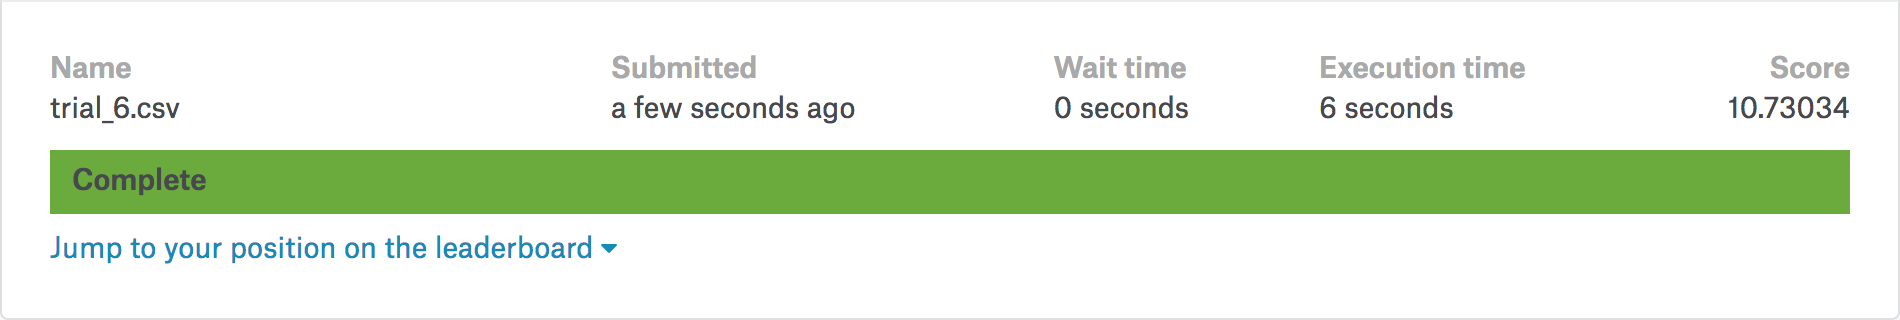

#### 2.

In [123]:
num_round = 300
param1 = {'objective': 'multi:softprob', 'num_class':38, "max_delta_step": 3}
watchlist1 = [(dtrain,'train'), (dtest, 'eval')]

bst = xgb.train(param1, dtrain, num_round, watchlist1, early_stopping_rounds=10)

[0]	train-merror:0.468452	eval-merror:0.483773
Multiple eval metrics have been passed: 'eval-merror' will be used for early stopping.

Will train until eval-merror hasn't improved in 10 rounds.
[1]	train-merror:0.349923	eval-merror:0.368905
[2]	train-merror:0.326301	eval-merror:0.347374
[3]	train-merror:0.315762	eval-merror:0.338882
[4]	train-merror:0.310275	eval-merror:0.335537
[5]	train-merror:0.306581	eval-merror:0.333891
[6]	train-merror:0.302383	eval-merror:0.33099
[7]	train-merror:0.299544	eval-merror:0.329449
[8]	train-merror:0.294979	eval-merror:0.326888
[9]	train-merror:0.291844	eval-merror:0.326287
[10]	train-merror:0.289248	eval-merror:0.324797
[11]	train-merror:0.279528	eval-merror:0.317455
[12]	train-merror:0.276601	eval-merror:0.316305
[13]	train-merror:0.273221	eval-merror:0.315626
[14]	train-merror:0.270992	eval-merror:0.315286
[15]	train-merror:0.268152	eval-merror:0.313405
[16]	train-merror:0.265574	eval-merror:0.313013
[17]	train-merror:0.263309	eval-merror:0.312856


In [107]:
my_test = xgb.DMatrix(np.asarray(mytest_))
test_predictions = bst.predict(my_test).astype(int)

In [112]:
print(classification_report(np.array(mytest.TripType), test_predictions))

             precision    recall  f1-score   support

          0       0.79      0.97      0.87      1482
          1       0.17      0.01      0.01       128
          2       0.76      0.83      0.79      1828
          3       0.70      0.74      0.72       499
          4       0.71      0.67      0.69      2345
          5       0.79      0.86      0.82      4807
          6       0.71      0.80      0.75      3769
          7       0.24      0.10      0.14       105
          8       0.00      0.00      0.00         2
          9       0.57      0.41      0.47       372
         10       0.35      0.35      0.35       197
         11       0.37      0.23      0.28       157
         12       0.68      0.62      0.65       252
         13       0.65      0.65      0.65       262
         14       0.39      0.34      0.36       343
         15       0.48      0.27      0.34        56
         16       0.59      0.60      0.60      1053
         17       0.70      0.76      0.72   

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [125]:
dmtest = xgb.DMatrix(np.asarray(test)) 
pred_prob2 = bst.predict(dmtest)

In [130]:
pred_prob2

array([[1.56444548e-05, 1.03413495e-05, 8.92633252e-05, ...,
        2.49301060e-03, 3.12594726e-04, 6.12052437e-03],
       [6.90555680e-05, 2.25163803e-05, 2.49967503e-04, ...,
        4.45183692e-03, 3.65277636e-04, 6.21630251e-03],
       [1.99993224e-07, 1.31580409e-08, 1.87003749e-07, ...,
        2.10459081e-08, 2.66808975e-08, 9.99919653e-01],
       ...,
       [4.22133416e-01, 1.17941208e-05, 9.74167197e-05, ...,
        2.26428001e-05, 1.15776111e-05, 6.57000067e-03],
       [7.59274144e-07, 9.41691553e-07, 3.27197085e-06, ...,
        6.30707014e-03, 3.15830694e-03, 1.01630700e-04],
       [1.40613542e-06, 4.75817217e-07, 2.90609069e-06, ...,
        9.87869222e-03, 3.99208337e-04, 2.58060492e-04]], dtype=float32)

In [145]:
col_array = np.asarray([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37])

In [146]:
columns = {0:"TripType_3", 1: "TripType_4", 2: "TripType_5", 3: "TripType_6", 
                4: "TripType_7", 5: "TripType_8", 6: "TripType_9", 7: "TripType_12", 8: "TripType_14", 
                9: "TripType_15", 10: "TripType_18", 11: "TripType_19", 12: "TripType_20", 13: "TripType_21",
                14: "TripType_22", 15: "TripType_23", 16: "TripType_24", 17: "TripType_25", 18: "TripType_26", 
                19: "TripType_27", 20: "TripType_28", 21: "TripType_29", 22: "TripType_30", 23: "TripType_31", 
                24: "TripType_32", 25: "TripType_33", 26: "TripType_34", 27: "TripType_35", 28: "TripType_36", 
                29: "TripType_37", 30: "TripType_38", 31: "TripType_39", 32: "TripType_40", 33: "TripType_41", 
                34: "TripType_42", 35: "TripType_43", 36: "TripType_44", 37: "TripType_999"}

In [147]:
def predic_proba_to_csv(pred_prob):
    proba_df = pd.DataFrame(pred_prob, columns=col_array)
    proba_df.columns = proba_df.columns.map(lambda x: columns[x])
    sub_df = pd.concat([test_VN[["VisitNumber"]], proba_df], axis=1)
    return sub_df.to_csv("data/trial_13.csv", index=False)

In [148]:
predic_proba_to_csv(pred_prob2)

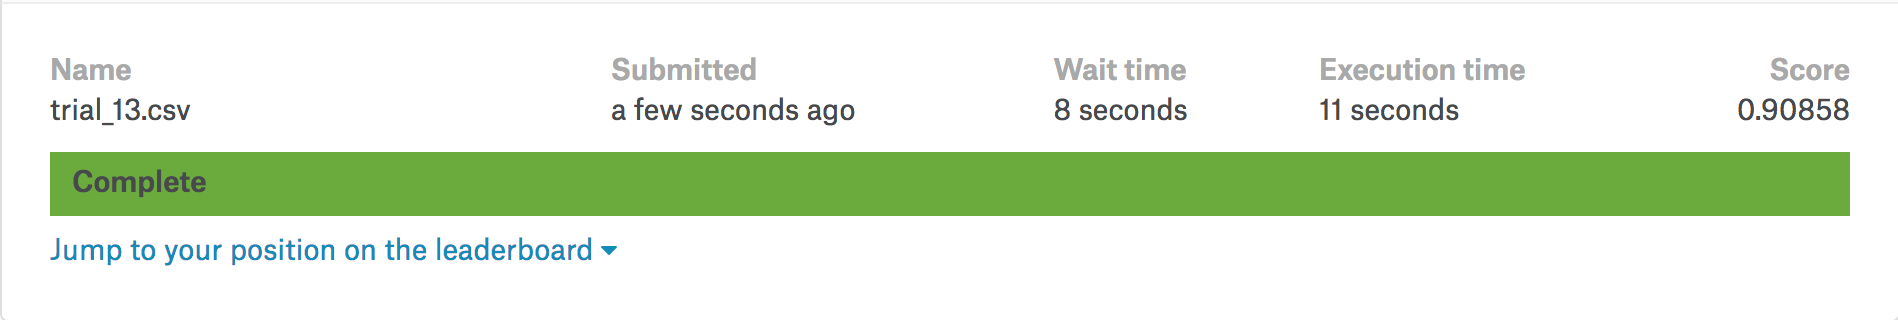

In [115]:
def prediction_to_csv(prediction):
    df_VN = pd.DataFrame(columns=["VisitNumber"])
    df_VN["VisitNumber"] = test.index
    df_TT = pd.DataFrame(columns=["TripType"])
    df_TT["TripType"] = prediction
    df_TT = pd.get_dummies(df_TT.TripType).astype(int, cbopy=False)
    df_TT = df_TT.rename(columns = {0:"TripType_3", 1: "TripType_4", 2: "TripType_5", 3: "TripType_6", 
                4: "TripType_7", 5: "TripType_8", 6: "TripType_9", 7: "TripType_12", 8: "TripType_14", 
                9: "TripType_15", 10: "TripType_18", 11: "TripType_19", 12: "TripType_20", 13: "TripType_21",
                14: "TripType_22", 15: "TripType_23", 16: "TripType_24", 17: "TripType_25", 18: "TripType_26", 
                19: "TripType_27", 20: "TripType_28", 21: "TripType_29", 22: "TripType_30", 23: "TripType_31", 
                24: "TripType_32", 25: "TripType_33", 26: "TripType_34", 27: "TripType_35", 28: "TripType_36", 
                29: "TripType_37", 30: "TripType_38", 31: "TripType_39", 32: "TripType_40", 33: "TripType_41", 
                34: "TripType_42", 35: "TripType_43", 36: "TripType_44", 37: "TripType_999"})
    trial = pd.concat([df_VN, df_TT], axis=1).set_index('VisitNumber')
    #trial["TripType_4"] = 0
    #trial["TripType_14"] = 0
    return trial.to_csv("data/trial_7.csv")

In [116]:
prediction_to_csv(prediction_xgb2)